**Question 1**: Do different segment groups tend to visit stores in varying divisions, states, etc.?

**Datasets Used**: STORE_LOOKUP and DRIVER_LOOKUP

**Methods Used**: Standard Merge

**Outline**:
I began by analyzing driver and store data, merging information from STORE_LOOKUP.csv and DRIVER_LOOKUP.csv using matching state and city fields to connect drivers with their visited stores. After merging, I grouped the dataset by driver segment group to calculate the number of unique states, divisions, and cities visited by each group. To better understand the results, I visualized these metrics using bar charts, which helped identify patterns in store visit behavior across different segment groups.

**Findings**: Customers in the "No Discount" segment are more likely to visit unique stores over those in the "Small Discount" segment.

**Recommendations**: The underlying issue may be that the current discount program isn’t appealing or motivating enough for drivers to remain loyal to specific stores. As a solution, Love's could engage drivers using its loyalty program and provide points based on the amount of unique stores that they visit.

**Question 2:** Does the driver’s age influence the number of gallons they fuel in a month?

**Datasets Used**: DRIVER_MONTHLY_PRODUCT_SALES and DRIVER_LOOKUP

**Outline**: First, we merge the two datasets then filter data to include only rows where CG_DEPARTMENT_DESC is "Fuel". To get the age of the driver, we subtract the driver's birth year from the current year (using datetime). We then group by the ages and calculate the sum of SALESTOTAL for each age grouping and display the data.

**Findings**: Drivers who are in their 30's, 40's, and 50's tend to purchase more fuel than other age groups, while those in their 20's and 60's tend to purchase the least amount of fuel.

**Recommendations**: Drivers in their 20's may be purchasing less fuel due to economic factors or lack of engagement. To fix this issue, Love's could promote their rewards program to young drivers using social media platforms such as Instagram or TikTok. For those in their 60's, Love's could offer a "Silver Tier" for drivers with over 20 years of driving experience, with unique benefits such as:

* Free meals after fueling up.
* Extended parking perks or priority spaces.
* Bonus points for health-conscious purchases (e.g., fresh food).



In [1]:
# Alexander Bharucha - Group 3
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# import pandas

import pandas as pd

# read csv for driver lookup
driver_lookup = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/DRIVER_LOOKUP.csv')

# read csv for monthly product sales
driver_monthly_product_sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/DRIVER_MONTHLY_PRODUCT_SALES.csv')

# read csv for store lookup
store_lookup = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/STORE_LOOKUP.csv')

import statistics as stats
median = stats.median(driver_monthly_product_sales['SALESTOTAL'])
print(median)

Mounted at /content/drive
25.95


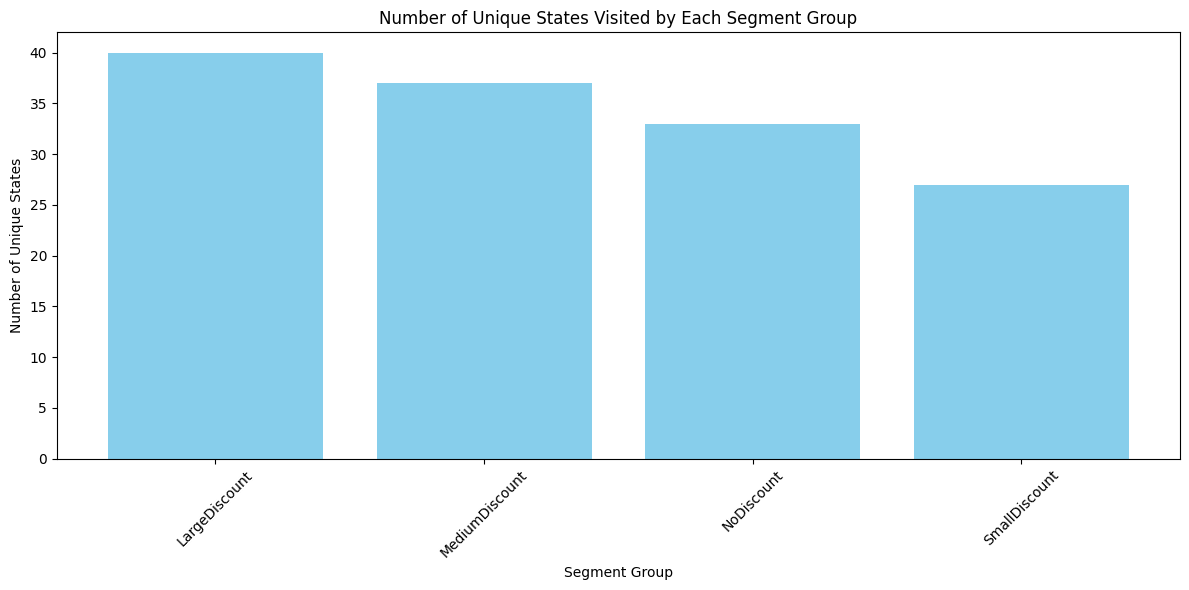

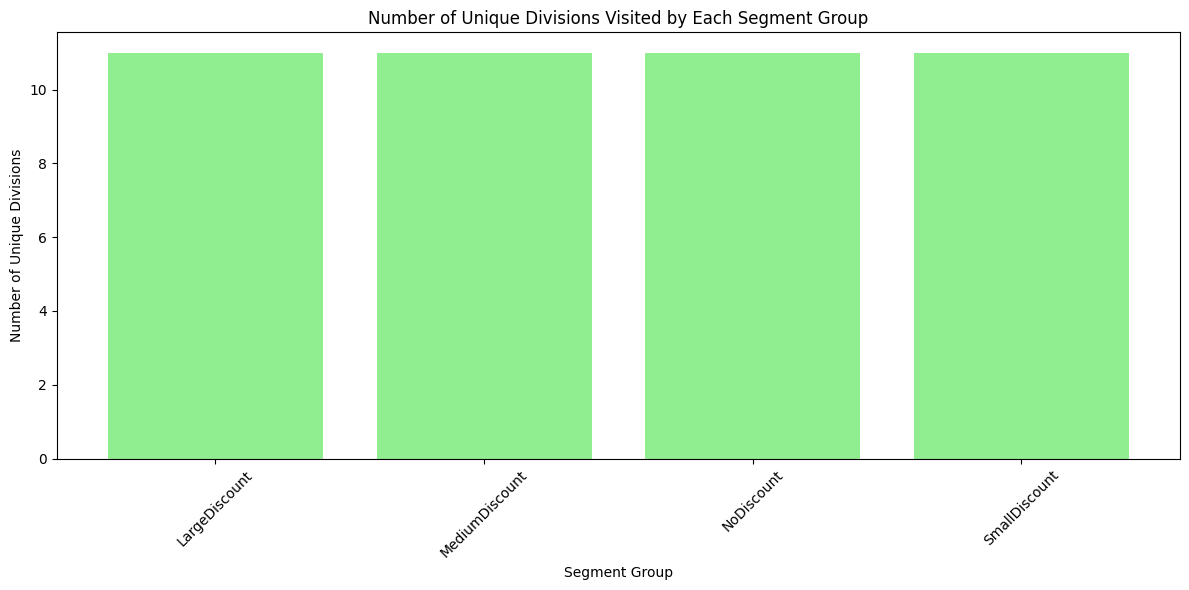

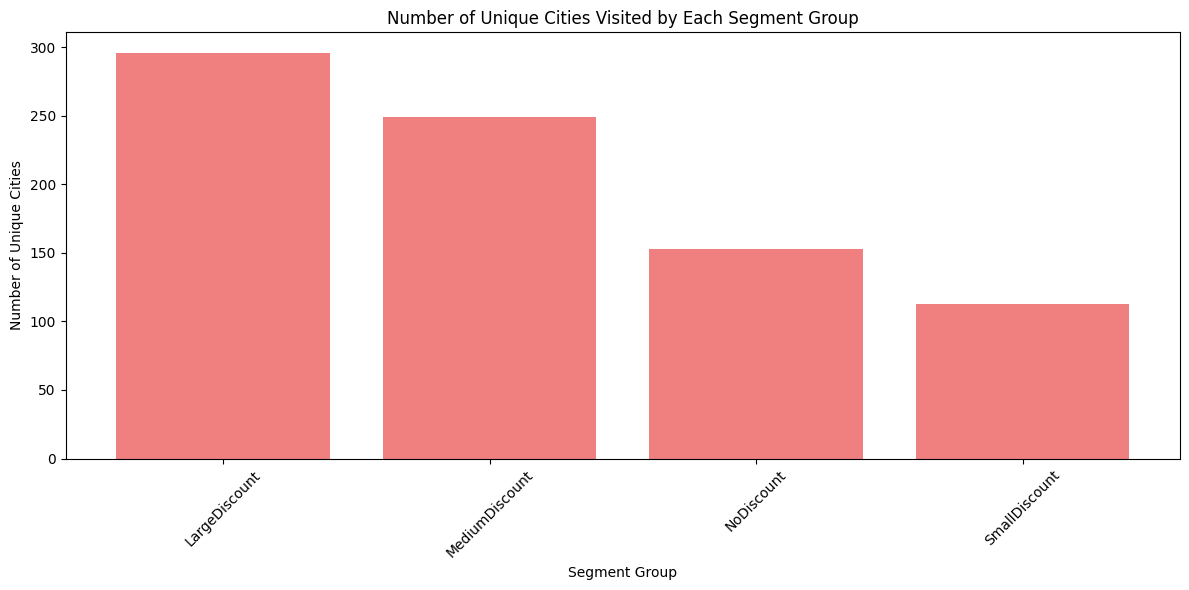

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Standardize column names to lowercase
store_lookup.columns = store_lookup.columns.str.lower()
driver_lookup.columns = driver_lookup.columns.str.lower()

# Standardize 'city' and 'state' values
driver_lookup['city'] = driver_lookup['city'].str.strip().str.title()
driver_lookup['state'] = driver_lookup['state'].str.strip().str.upper()

store_lookup['city'] = store_lookup['city'].str.strip().str.title()
store_lookup['state'] = store_lookup['state'].str.strip().str.upper()

# Create a mapping from full state names to abbreviations
state_abbreviation_map = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR',
    'CALIFORNIA': 'CA', 'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE',
    'FLORIDA': 'FL', 'GEORGIA': 'GA', 'HAWAII': 'HI', 'IDAHO': 'ID',
    'ILLINOIS': 'IL', 'INDIANA': 'IN', 'IOWA': 'IA', 'KANSAS': 'KS',
    'KENTUCKY': 'KY', 'LOUISIANA': 'LA', 'MAINE': 'ME', 'MARYLAND': 'MD',
    'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI', 'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS',
    'MISSOURI': 'MO', 'MONTANA': 'MT', 'NEBRASKA': 'NE', 'NEVADA': 'NV',
    'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ', 'NEW MEXICO': 'NM', 'NEW YORK': 'NY',
    'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND', 'OHIO': 'OH', 'OKLAHOMA': 'OK',
    'OREGON': 'OR', 'PENNSYLVANIA': 'PA', 'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC',
    'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN', 'TEXAS': 'TX', 'UTAH': 'UT',
    'VERMONT': 'VT', 'VIRGINIA': 'VA', 'WASHINGTON': 'WA', 'WEST VIRGINIA': 'WV',
    'WISCONSIN': 'WI', 'WYOMING': 'WY'
}

# Map the full state names in driver_lookup to abbreviations
driver_lookup['state'] = driver_lookup['state'].map(state_abbreviation_map).fillna(driver_lookup['state'])

# Perform inner join on 'state' and 'city'
merged_data = pd.merge(driver_lookup, store_lookup, on=['state', 'city'], how='inner')

if merged_data.empty:
    print("Merged data is empty; ensure the datasets have matching 'state' and 'city' keys.")
else:
    # Group by 'segmentgroup' to find unique store states, divisions, and cities visited
    unique_states_by_segment = merged_data.groupby('segmentgroup')['state'].nunique().reset_index(name='unique_states_count')
    unique_divisions_by_segment = merged_data.groupby('segmentgroup')['division'].nunique().reset_index(name='unique_divisions_count')
    unique_cities_by_segment = merged_data.groupby('segmentgroup')['city'].nunique().reset_index(name='unique_cities_count')

    # Plot: Number of Unique States Visited by Segment Group
    plt.figure(figsize=(12, 6))
    plt.bar(unique_states_by_segment['segmentgroup'], unique_states_by_segment['unique_states_count'], color='skyblue')
    plt.title('Number of Unique States Visited by Each Segment Group')
    plt.xlabel('Segment Group')
    plt.ylabel('Number of Unique States')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot: Number of Unique Divisions Visited by Segment Group
    plt.figure(figsize=(12, 6))
    plt.bar(unique_divisions_by_segment['segmentgroup'], unique_divisions_by_segment['unique_divisions_count'], color='lightgreen')
    plt.title('Number of Unique Divisions Visited by Each Segment Group')
    plt.xlabel('Segment Group')
    plt.ylabel('Number of Unique Divisions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot: Number of Unique Cities Visited by Segment Group
    plt.figure(figsize=(12, 6))
    plt.bar(unique_cities_by_segment['segmentgroup'], unique_cities_by_segment['unique_cities_count'], color='lightcoral')
    plt.title('Number of Unique Cities Visited by Each Segment Group')
    plt.xlabel('Segment Group')
    plt.ylabel('Number of Unique Cities')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

  AGE_GROUP    SALESTOTAL
0       20s  1.584735e+08
1       30s  5.270730e+08
2       40s  5.270304e+08
3       50s  5.336846e+08
4       60s  2.619597e+08


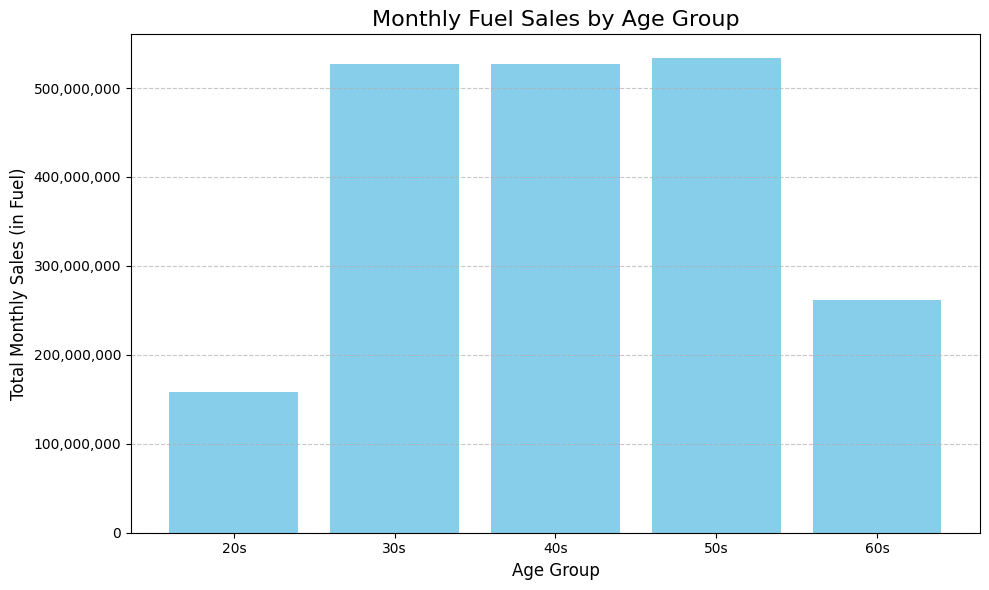

In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Add age column to driver_lookup
current_year = datetime.now().year
driver_lookup['AGE'] = current_year - pd.to_datetime(driver_lookup['BIRTHDATE']).dt.year

# Define age groups
def age_group(age):
    if 20 <= age < 30:
        return '20s'
    elif 30 <= age < 40:
        return '30s'
    elif 40 <= age < 50:
        return '40s'
    elif 50 <= age < 60:
        return '50s'
    elif 60 <= age < 70:
        return '60s'
    else:
        return 'Others'

driver_lookup['AGE_GROUP'] = driver_lookup['AGE'].apply(age_group)

# Merge the two datasets on DRIVER_ID
merged_data = pd.merge(driver_monthly_product_sales, driver_lookup, on='DRIVER_ID', how='inner')

# Convert SALESTOTAL to numeric
merged_data['SALESTOTAL'] = pd.to_numeric(merged_data['SALESTOTAL'], errors='coerce')

# Filter for Fuel product type
fuel_sales = merged_data[merged_data['PRODUCTTYPE'] == 'Fuel']

# Group by age group and calculate total sales
sales_by_age_group = fuel_sales.groupby('AGE_GROUP')['SALESTOTAL'].sum().reset_index()

# Debugging: Print the aggregated data
print(sales_by_age_group)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sales_by_age_group['AGE_GROUP'], sales_by_age_group['SALESTOTAL'], color='skyblue')
plt.title('Monthly Fuel Sales by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Monthly Sales (in Fuel)', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
